_My notebook on_
# Python for Data Analysis - Wes McKinney
## Chapter 4 - NumPy Basics: Arrays and Vectorized Computation
### Part 4, 5, 6, and 7

In [1]:
import numpy as np

# 4 File Input and Output with Arrays

In [2]:
# save/load

arr = np.arange(10)
# serialize the array to file my_array.npy - using a binary Numpy custom format
np.save('my_array.npy', arr)

# deserialize an array
np.load('my_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# savez

np.savez('my_arrays.npz', a=arr, b=arr)
arch = np.load('my_arrays.npz')
print(arch['a'], arch['b'])

np.savez_compressed('my_arrays.npz', a=arr, b=arr)
arch = np.load('my_arrays.npz')
print(arch['a'], arch['b'])

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


# 5 Linear Algebra

In [4]:
# matrix dot multiplication

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])
print(x)
print(y)
print('---')

print(x.dot(y))
print(np.dot(x, y))
print(x @ y)
print('---')

print(y.dot(x))
print(np.dot(y, x))
print(y @ x)
print('---')

print(np.dot(x, np.ones(3)))
print(x.dot(np.ones(3)))
print(x @ np.ones(3))

[[1 2 3]
 [4 5 6]]
[[ 6 23]
 [-1  7]
 [ 8  9]]
---
[[ 28  64]
 [ 67 181]]
[[ 28  64]
 [ 67 181]]
[[ 28  64]
 [ 67 181]]
---
[[ 98 127 156]
 [ 27  33  39]
 [ 44  61  78]]
[[ 98 127 156]
 [ 27  33  39]
 [ 44  61  78]]
[[ 98 127 156]
 [ 27  33  39]
 [ 44  61  78]]
---
[ 6. 15.]
[ 6. 15.]
[ 6. 15.]


In [5]:
# numpy.linalg
from numpy.linalg import inv, qr

x = np.random.randn(5, 5)
print(x)

mat = x.T.dot(x)
print(mat)

print(inv(mat))

print(mat.dot(inv(mat)))

q, r = qr(mat)

print(q)
print(r)

[[-0.37108492  0.39758084 -0.67712396 -0.65597475  0.85731244]
 [ 0.26111507  0.81223605  0.2836537  -1.33648944  0.7525025 ]
 [ 1.07232464 -0.90432161 -0.50934645  0.0046784  -0.96003073]
 [ 1.26180394 -0.41853339  0.00311184  0.57731796  1.10868679]
 [-1.06899967  0.04299688  1.14421539  0.37666786  0.33994403]]
[[ 4.09067471 -1.47924625 -1.44008735  0.22526584 -0.11556528]
 [-1.47924625  1.81261443  0.46969052 -1.57600998  1.37083129]
 [-1.44008735  0.46969052  2.10762862  0.49547881  0.51435081]
 [ 0.22526584 -1.57600998  0.49547881  2.69170349 -0.8044676 ]
 [-0.11556528  1.37083129  0.51435081 -0.8044676   3.56765198]]
[[ 0.79215206  1.4921072   0.1589875   0.65144964 -0.42369244]
 [ 1.4921072   4.94912415 -0.35945     2.46687456 -1.2452376 ]
 [ 0.1589875  -0.35945     0.76556578 -0.38050037 -0.05290619]
 [ 0.65144964  2.46687456 -0.38050037  1.68432776 -0.49211249]
 [-0.42369244 -1.2452376  -0.05290619 -0.49211249  0.64170225]]
[[ 1.00000000e+00 -5.54813077e-16 -5.29811049e-17 -9

# 6 Pseudorandom Number Generation

In [6]:
# set a global random seed
np.random.seed(42)

# a 4 × 4 array of samples from the standard normal distribution
print(np.random.normal(size=(4, 4)))

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]


In [7]:
# random number generator isolated from others

rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 7 Example: Random Walks

In [8]:
# A single random walk with 1,000 steps using the built-in random module
import random
import matplotlib.pyplot as plt

STEPS = 1000

pos = 0
walk = [pos]
for i in range(STEPS):
    pos += random.choice([-1, 1])
    walk.append(pos)

plt.plot(walk)

def index(walk, value):
    try:
        negative = walk.index(-value)
    except:
        negative = STEPS

    try:
        positive = walk.index(value)
    except:
        positive = STEPS

    return min(negative, positive)


print(min(walk), max(walk))
pos = index(walk, 10)
print(pos)

-36 0
30


-8 -8 41 41
55
55


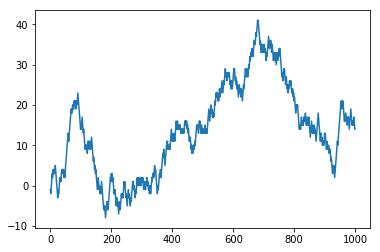

In [9]:
draws = np.random.choice([-1, 1], size=1000)
walk = draws.cumsum()
plt.plot(walk)
print(min(walk), walk.min(), max(walk), walk.max())
print((np.abs(walk) >= 10).argmax())
pos = next(i for i, v in enumerate(walk) if abs(v)==10)
print(pos)

75 -80
469.375


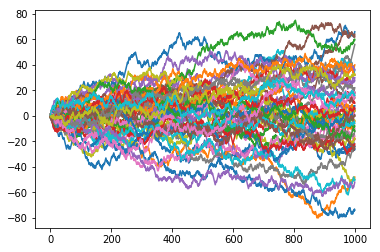

In [11]:
# Simulating Many Random Walks at Once

nwalks = 50
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(1)
walks
for i in range(nwalks):
    plt.plot(walks[i])

print(walks.max(), walks.min())

hits30 = (np.abs(walks) >= 30).any(1)
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times.mean())